# Results

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [266]:
filepath = "./output/long_term_carbon_model/20230320-172424/summary_0320-1750.xlsx"
sheet_1 = "mean energy"
sheet_2 = "mean carbon"
energy_df = pd.read_excel(filepath, sheet_name = sheet_1)
carbon_df = pd.read_excel(filepath, sheet_name = sheet_2)

carbon_df

Scenario       group  Origin Datacentre  Content Delivery Network  \
0      default  d_000_h_00        1661.309403               7183.886846   
1          NaN  d_000_h_01        1088.826702               4706.133351   
2          NaN  d_000_h_02         360.174558               1556.963095   
3          NaN  d_000_h_03         249.493253               1079.219933   
4          NaN  d_000_h_04         215.710049                933.056808   
...        ...         ...                ...                       ...   
17515      NaN  d_364_h_19        1728.269676               7560.189991   
17516      NaN  d_364_h_20        2554.145176              11180.035054   
17517      NaN  d_364_h_21        3855.258748              16863.235708   
17518      NaN  d_364_h_22        2836.255097              12410.117963   
17519      NaN  d_364_h_23        2200.085906               9631.465325   

       Core Network  Access Network            TV  
0       9242.046499     6459.501159  1.238903e+06  
1       6052.281060     4221.555461  8.100558e+05  
2       2002.059422     1401.043457  2.687278e+05  
3       1387.238676      969.529878  1.858566e+05  
4       1201.983662      839.211326  1.609437e+05  
...             ...             ...           ...  
17515   9532.010600     6768.573429  1.751109e+06  
17516  14091.887686    10011.841863  2.592697e+06  
17517  21258.970888    15106.358760  3.912200e+06  
17518  15631.516393    11115.557295  2.881052e+06  
17519  12147.127414     8620.344247  2.232232e+06  

[17520 rows x 7 columns]

### Format Data

This following code:

- Create column for day number, hour number and total of all the carbon/energy values
- Split into data frames for each scenario (SDR, HDR)
- Make grouping the index

In [267]:
#Function to extract day number
def get_day(group):
    day = group.split("_")[1]
    return int(day)

def get_hour(group):
    hour = group.split("_")[3]
    return int(hour)

def total(df):
    total = df["Origin Datacentre"] + df["Content Delivery Network"] + df["Core Network"] + df["Access Network"] + df["TV"]
    return total    
#Make a cloumn for day and hour
energy_df["day"] = energy_df["group"].apply(get_day)
energy_df["hour"] = energy_df["group"].apply(get_hour)

carbon_df["day"] = carbon_df["group"].apply(get_day)
carbon_df["hour"] = carbon_df["group"].apply(get_hour)

#make total column
energy_df["total"] = total(energy_df)
carbon_df["total"] = total(carbon_df)

energy_df = energy_df[["Scenario","group","day","hour","Origin Datacentre","Content Delivery Network","Core Network","Access Network","TV","total"]]
carbon_df = carbon_df[["Scenario","group","day","hour","Origin Datacentre","Content Delivery Network","Core Network","Access Network","TV","total"]]

carbon_df

Scenario       group  day  hour  Origin Datacentre  \
0      default  d_000_h_00    0     0        1661.309403   
1          NaN  d_000_h_01    0     1        1088.826702   
2          NaN  d_000_h_02    0     2         360.174558   
3          NaN  d_000_h_03    0     3         249.493253   
4          NaN  d_000_h_04    0     4         215.710049   
...        ...         ...  ...   ...                ...   
17515      NaN  d_364_h_19  364    19        1728.269676   
17516      NaN  d_364_h_20  364    20        2554.145176   
17517      NaN  d_364_h_21  364    21        3855.258748   
17518      NaN  d_364_h_22  364    22        2836.255097   
17519      NaN  d_364_h_23  364    23        2200.085906   

       Content Delivery Network  Core Network  Access Network            TV  \
0                   7183.886846   9242.046499     6459.501159  1.238903e+06   
1                   4706.133351   6052.281060     4221.555461  8.100558e+05   
2                   1556.963095   2002.059422     1401.043457  2.687278e+05   
3                   1079.219933   1387.238676      969.529878  1.858566e+05   
4                    933.056808   1201.983662      839.211326  1.609437e+05   
...                         ...           ...             ...           ...   
17515               7560.189991   9532.010600     6768.573429  1.751109e+06   
17516              11180.035054  14091.887686    10011.841863  2.592697e+06   
17517              16863.235708  21258.970888    15106.358760  3.912200e+06   
17518              12410.117963  15631.516393    11115.557295  2.881052e+06   
17519               9631.465325  12147.127414     8620.344247  2.232232e+06   

              total  
0      1.263450e+06  
1      8.261246e+05  
2      2.740480e+05  
3      1.895420e+05  
4      1.641337e+05  
...             ...  
17515  1.776698e+06  
17516  2.630535e+06  
17517  3.969284e+06  
17518  2.923045e+06  
17519  2.264831e+06  

[17520 rows x 10 columns]

In [268]:
#Spilt SDR and HDR scenarios
split_index = energy_df.loc[energy_df["Scenario"] == "HDR"].index[0]
sdr_energy_df = energy_df[:split_index]  
hdr_energy_df = energy_df[split_index:]

sdr_carbon_df = carbon_df[:split_index]
hdr_carbon_df = carbon_df[split_index:]

#Make index group
sdr_energy_df = sdr_energy_df.reset_index()

hdr_energy_df = hdr_energy_df.reset_index()

sdr_carbon_df = sdr_carbon_df.reset_index()
hdr_carbon_df = hdr_carbon_df.reset_index()


#Drop scenario colum
sdr_energy_df = sdr_energy_df.drop(columns = ["Scenario","index","group"])
hdr_energy_df = hdr_energy_df.drop(columns = ["Scenario","index","group"])

sdr_carbon_df = sdr_carbon_df.drop(columns = ["Scenario","index","group"])
hdr_carbon_df = hdr_carbon_df.drop(columns = ["Scenario","index","group"])

hdr_carbon_df

day  hour  Origin Datacentre  Content Delivery Network  Core Network  \
0       0     0         892.752038               3906.082553   4921.305150   
1       0     1         595.190306               2604.724048   3281.387650   
2       0     2         193.810596                848.330619   1069.776143   
3       0     3         131.544106                575.311884    725.107867   
4       0     4         113.860788                498.361931    628.119040   
...   ...   ...                ...                       ...           ...   
8755  364    19        1728.269676               7560.189991   9532.010600   
8756  364    20        2554.145176              11180.035054  14091.887686   
8757  364    21        3855.258748              16863.235708  21258.970888   
8758  364    22        2836.255097              12410.117963  15631.516393   
8759  364    23        2200.085906               9631.465325  12147.127414   

      Access Network            TV         total  
0        3495.692424  9.066052e+05  9.198210e+05  
1        2335.169320  6.046374e+05  6.134538e+05  
2         760.150472  1.966746e+05  1.995466e+05  
3         515.160536  1.335398e+05  1.354869e+05  
4         446.371244  1.155099e+05  1.171967e+05  
...              ...           ...           ...  
8755     6768.573429  1.751109e+06  1.776698e+06  
8756    10011.841863  2.592697e+06  2.630535e+06  
8757    15106.358760  3.912200e+06  3.969284e+06  
8758    11115.557295  2.881052e+06  2.923045e+06  
8759     8620.344247  2.232232e+06  2.264831e+06  

[8760 rows x 8 columns]

## Plots 

- Raw plots
- Average plots
- Normalised plots
- Standardised plots

### Raw Plots

In [1]:
def plot_hourly(x,y_list,x_label,y_label,title):
    fig, ax = plt.subplots(figsize=(, 20))
    for y in y_list:
        ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(range(len(y_list)))
    plt.show()
    fig.clf()
    
def plot_daily(x,y_list,x_label,y_label,title):
    fig, ax = plt.subplots(figsize=(50, 10))
    for y in y_list:
        ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(range(len(y_list)))
    plt.show()
    fig.clf()

plot_hourly(hdr_carbon_df.index,[hdr_carbon_df["total"], sdr_carbon_df["total"]],"Hours","Carbon (g/kWh)","Total Carbon Emission for SDR vs HDR")

SyntaxError: invalid syntax (Temp/ipykernel_17108/310824209.py, line 2)

## Average 

Plot based on daily average. Also including rolling mean

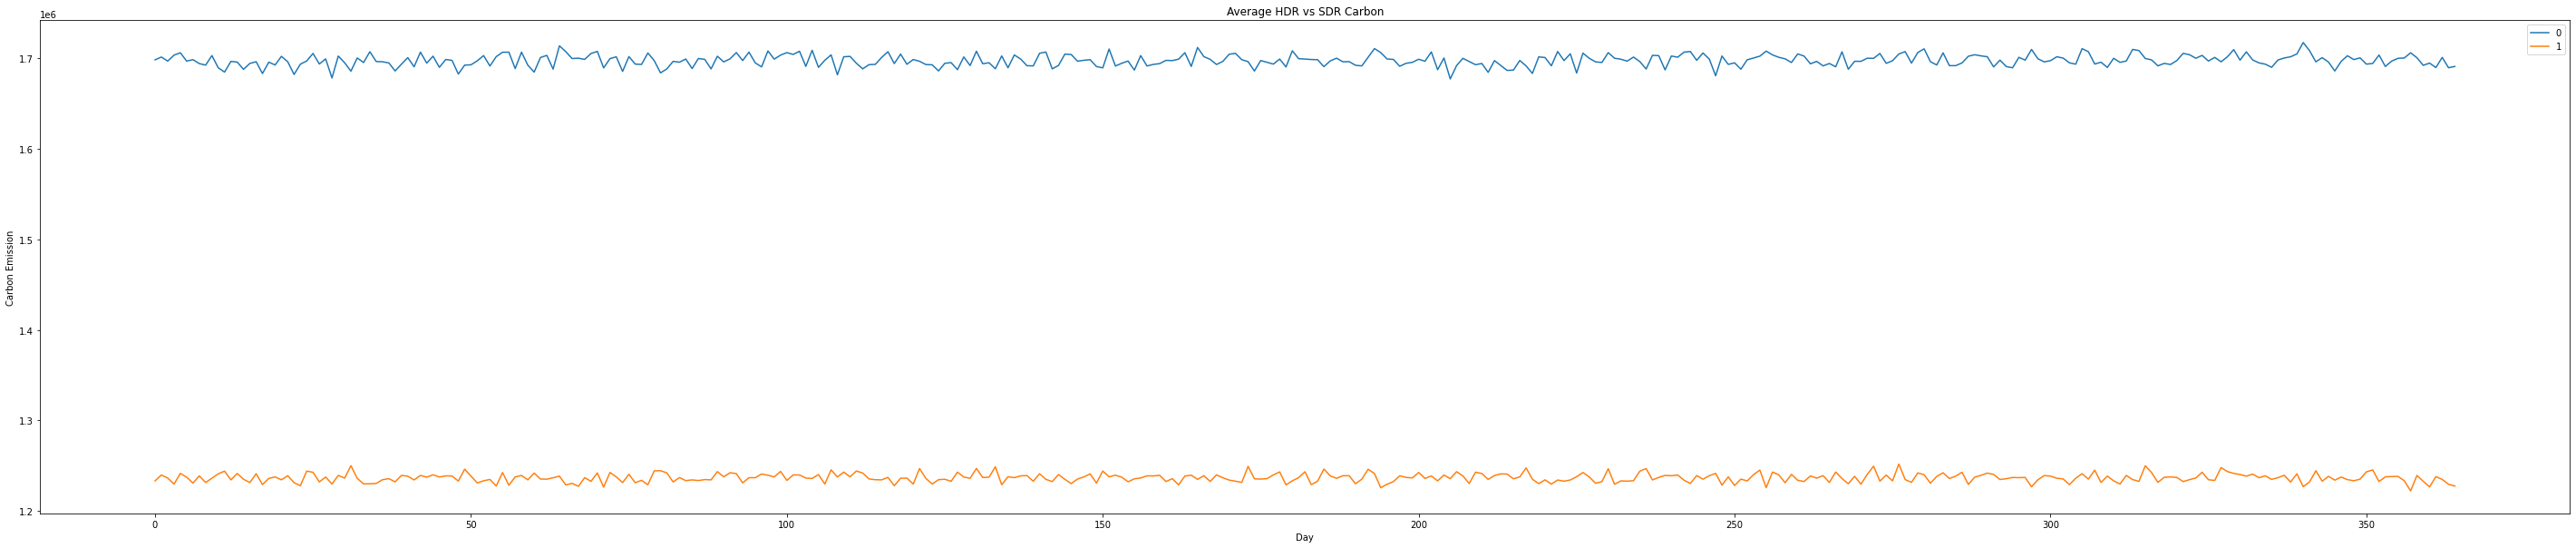

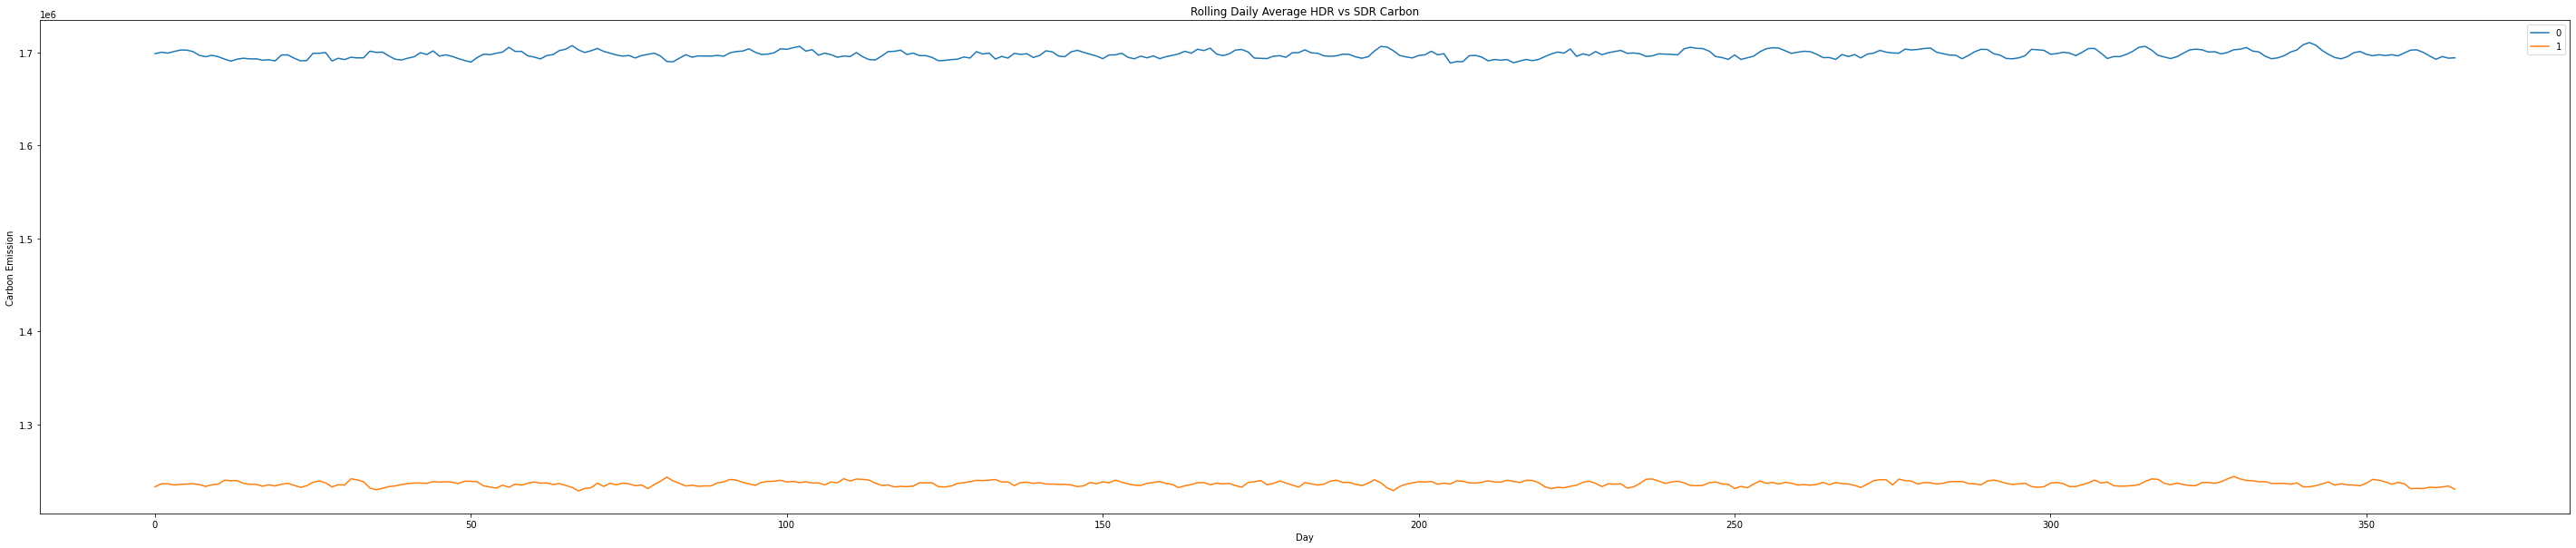

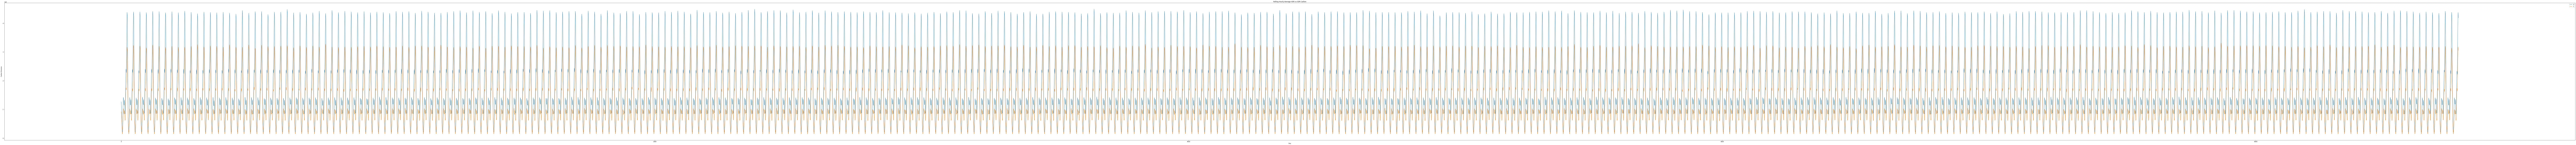

In [270]:
def get_average_df(df):
    new_df = df.groupby(["day"]).mean()
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns="hour")
    return new_df

def rolling_mean(col):
    return col.rolling(window=3,min_periods=1).mean()

def df_rolling_mean(df,columns):
    new_df = df
    for col in columns:
        new_df[col] = rolling_mean(new_df[col])
    return new_df

#Average

df_hdr_c_a = get_average_df(hdr_carbon_df)
df_sdr_c_a = get_average_df(sdr_carbon_df)

plot_daily(df_sdr_c_a.index,[df_sdr_c_a["total"], df_hdr_c_a["total"]], "Day", "Carbon Emission","Average HDR vs SDR Carbon")


#Rolling Mean Day

df_hdr_c_a_rm = df_rolling_mean(df_hdr_c_a,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])
df_sdr_c_a_rm = df_rolling_mean(df_sdr_c_a,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])

plot_daily(df_hdr_c_a_rm.index,[df_sdr_c_a_rm["total"], df_hdr_c_a_rm["total"]], "Day", "Carbon Emission","Rolling Daily Average HDR vs SDR Carbon")


#Rolling Mean Hour

df_hdr_c_rm = df_rolling_mean(hdr_carbon_df,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])
df_sdr_c_rm = df_rolling_mean(sdr_carbon_df,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])

plot_hourly(df_sdr_c_rm.index,[df_sdr_c_rm["total"], df_hdr_c_rm["total"]], "Day", "Carbon Emission","Rolling Hourly Average HDR vs SDR Carbon")



## Normalisation and standardisation

In [271]:
def log(df):
    df = df.apply(np.log)
    df = df.mean()
    return df

def min_max(df):
    df = (df.mean() - df.min()) / (df.max() - df.min())        
    return df

#def cut(year_mean)

#def clip(df):
#    year_mean = df.mean()
#    day_mean = df.groupby(["day"]).apply()
#    if 
def standardization(df):
    new_df = (df - df.mean())/df.std()
    return new_df

def get_new_df(df):
    new_df = df.groupby(["day"]).apply(min_max)
    return new_df    

### Carbon

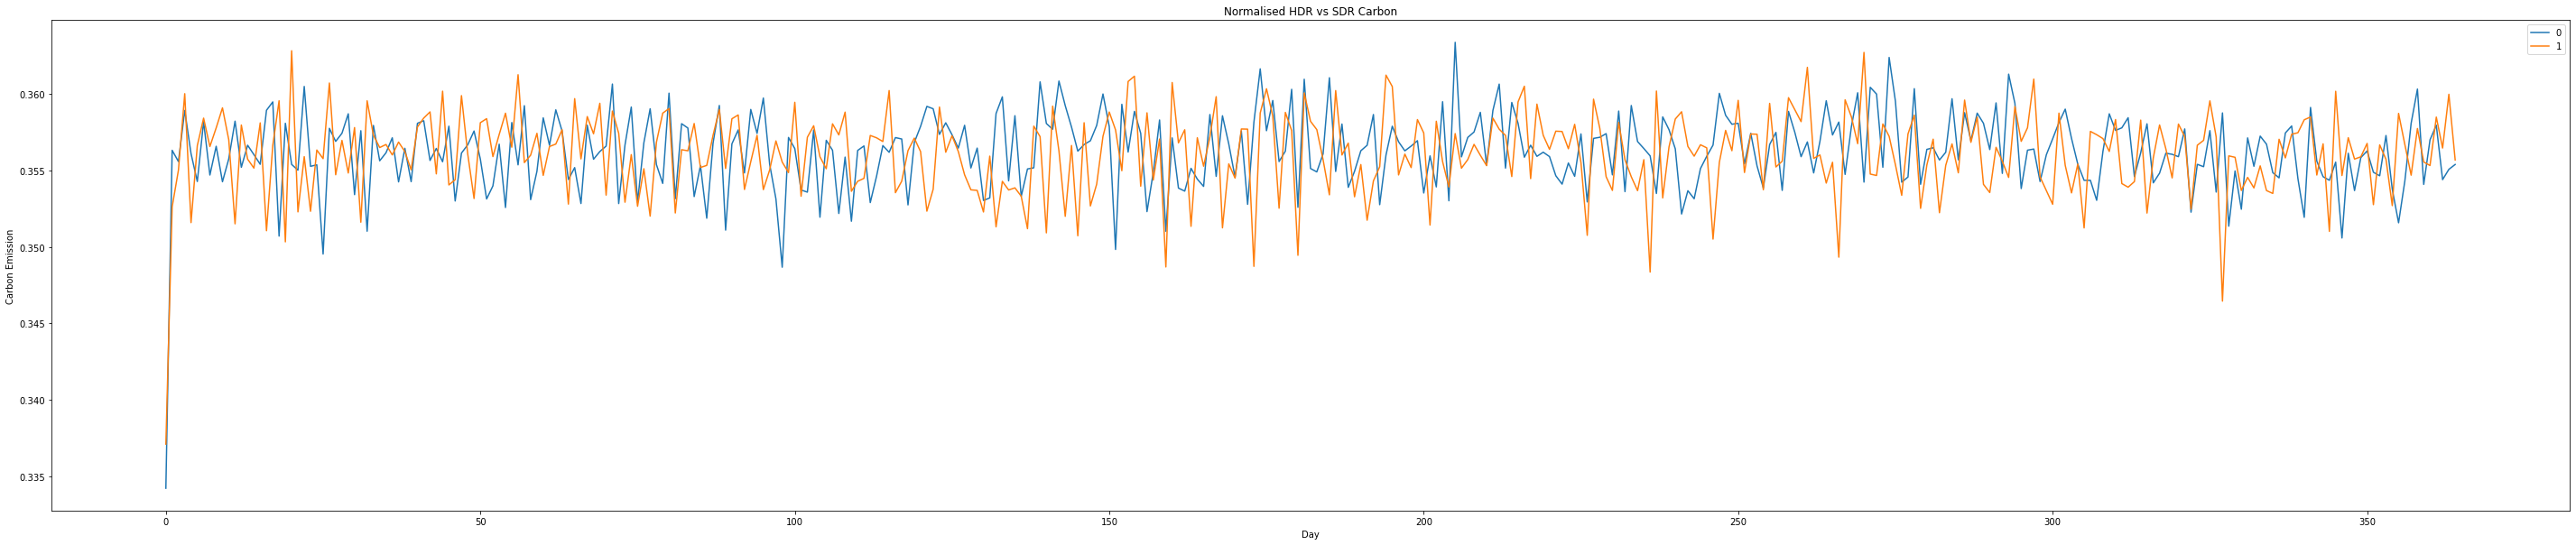

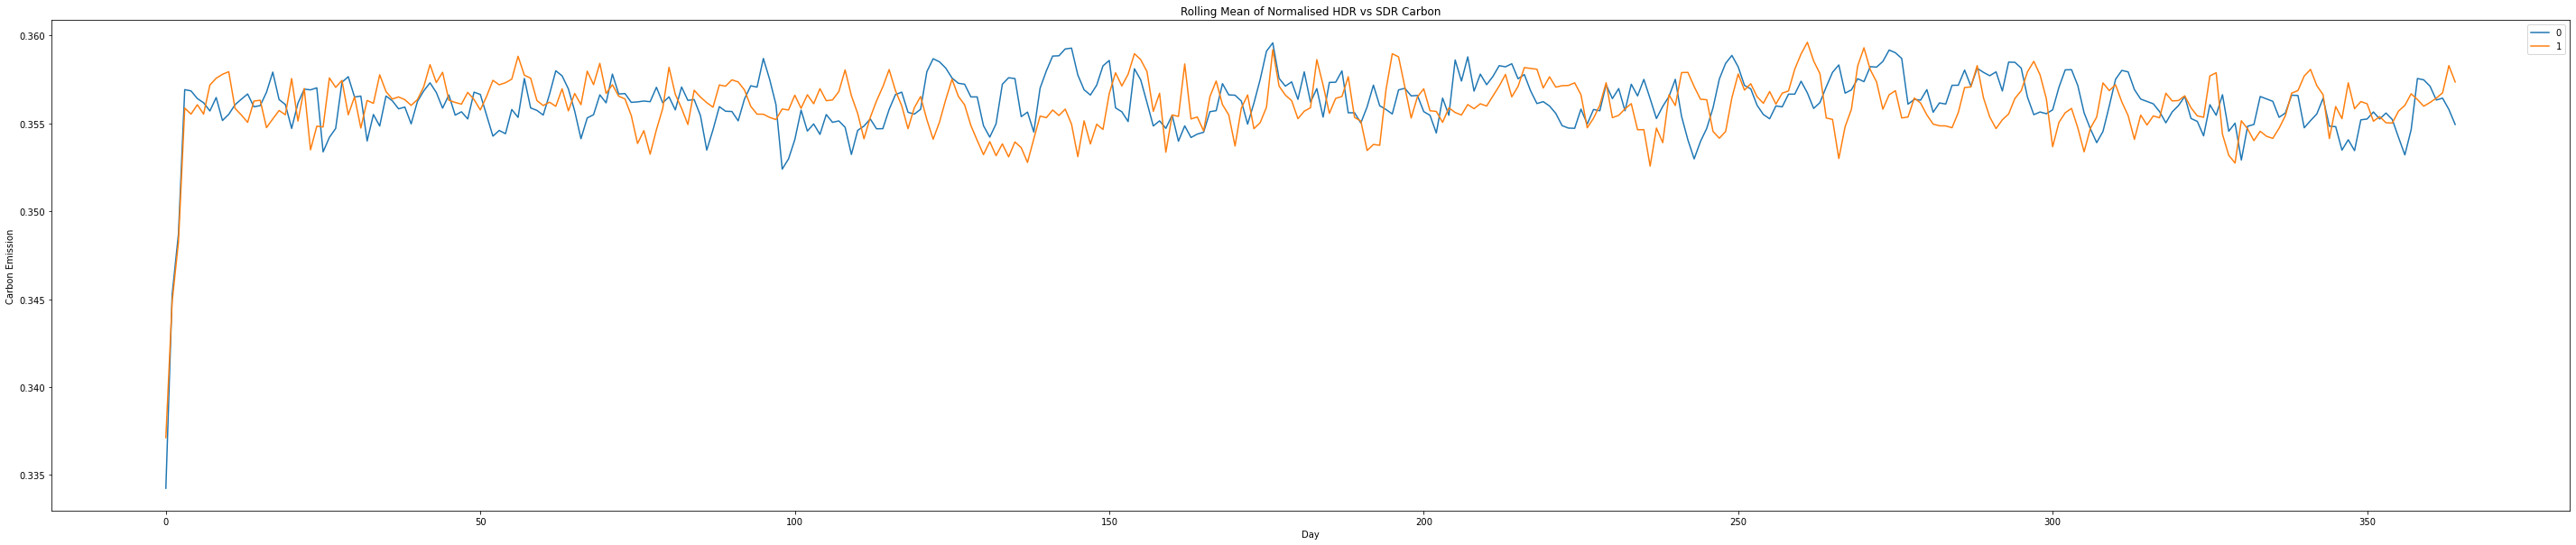

In [272]:
#Normalised

df_hdr_c_n = get_new_df(hdr_carbon_df)
df_sdr_c_n = get_new_df(sdr_carbon_df)

plot_daily(df_sdr_c_n.index,[df_sdr_c_n["total"], df_hdr_c_n["total"]], "Day", "Carbon Emission","Normalised HDR vs SDR Carbon")

#Normailsed with rolling mean

df_sdr_c_n_rm = df_rolling_mean(df_sdr_c_n,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])
df_hdr_c_n_rm = df_rolling_mean(df_hdr_c_n,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])

plot_daily(df_sdr_c_n_rm.index,[df_sdr_c_n_rm["total"], df_hdr_c_n_rm["total"]], "Day", "Carbon Emission","Rolling Mean of Normalised HDR vs SDR Carbon")

In [276]:
df_sdr_c_n_rm

day  hour  Origin Datacentre  Content Delivery Network  Core Network  \
day                                                                         
0    NaN   0.5           0.333985                  0.334029      0.333982   
1    NaN   0.5           0.345248                  0.345198      0.345172   
2    NaN   0.5           0.348668                  0.348640      0.348538   
3    NaN   0.5           0.356917                  0.356857      0.356802   
4    NaN   0.5           0.356713                  0.356691      0.356628   
..   ...   ...                ...                       ...           ...   
360  NaN   0.5           0.357169                  0.357157      0.357189   
361  NaN   0.5           0.356373                  0.356340      0.356402   
362  NaN   0.5           0.356374                  0.356351      0.356368   
363  NaN   0.5           0.355779                  0.355808      0.355759   
364  NaN   0.5           0.354905                  0.354962      0.354886   

     Access Network        TV     total  
day                                      
0          0.334141  0.334249  0.334245  
1          0.345167  0.345275  0.345273  
2          0.348611  0.348706  0.348704  
3          0.356817  0.356925  0.356923  
4          0.356765  0.356855  0.356851  
..              ...       ...       ...  
360        0.357096  0.357119  0.357119  
361        0.356293  0.356333  0.356334  
362        0.356407  0.356439  0.356438  
363        0.355860  0.355796  0.355796  
364        0.354983  0.354941  0.354941  

[365 rows x 8 columns]

### Energy

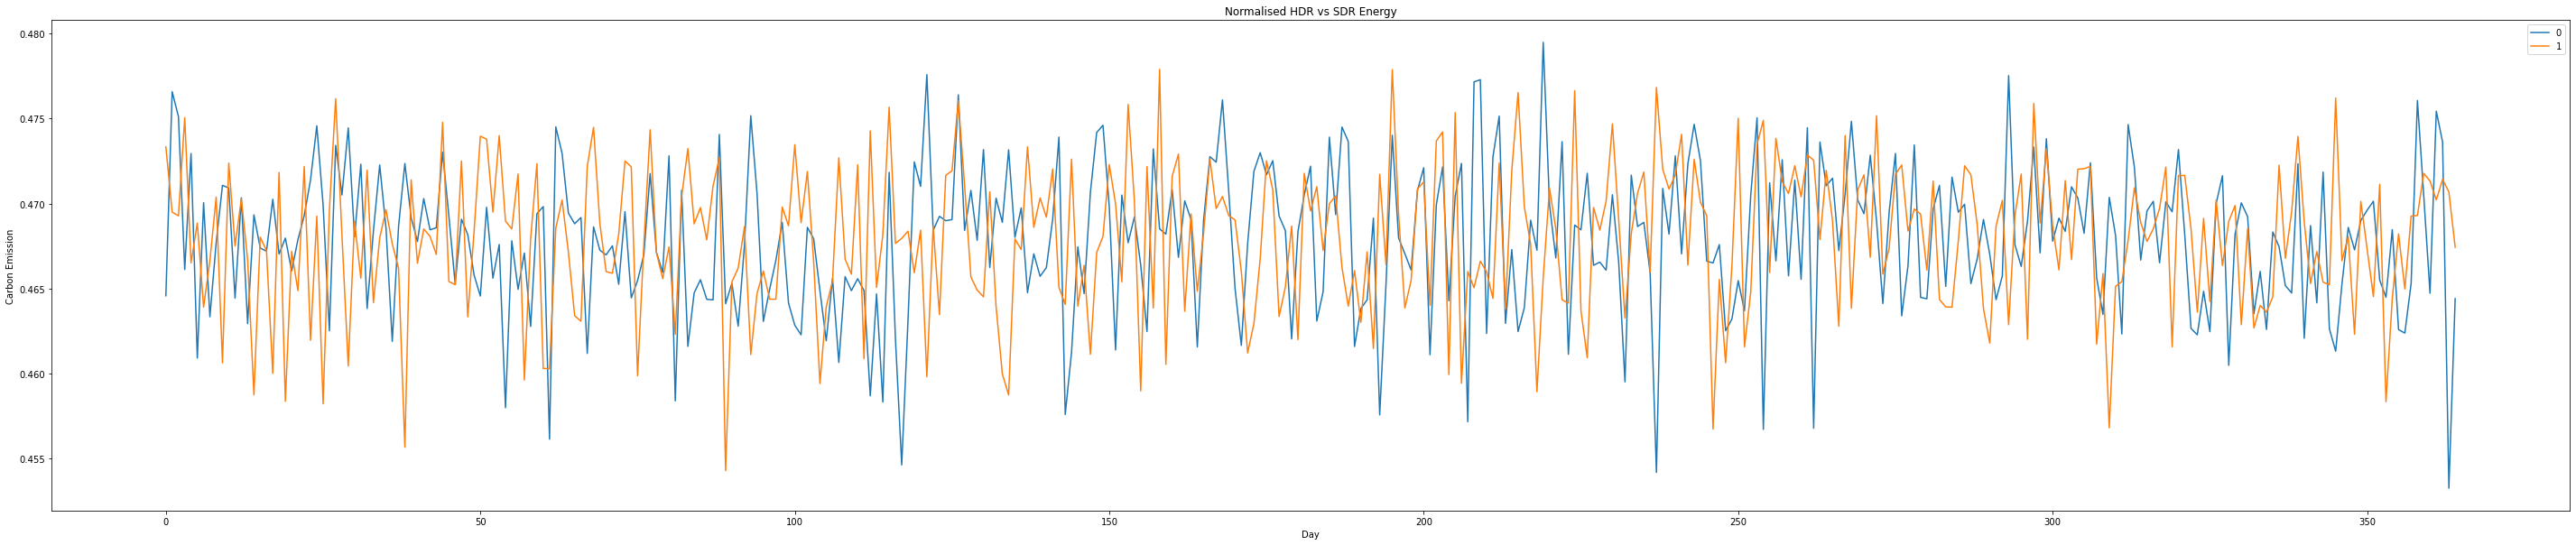

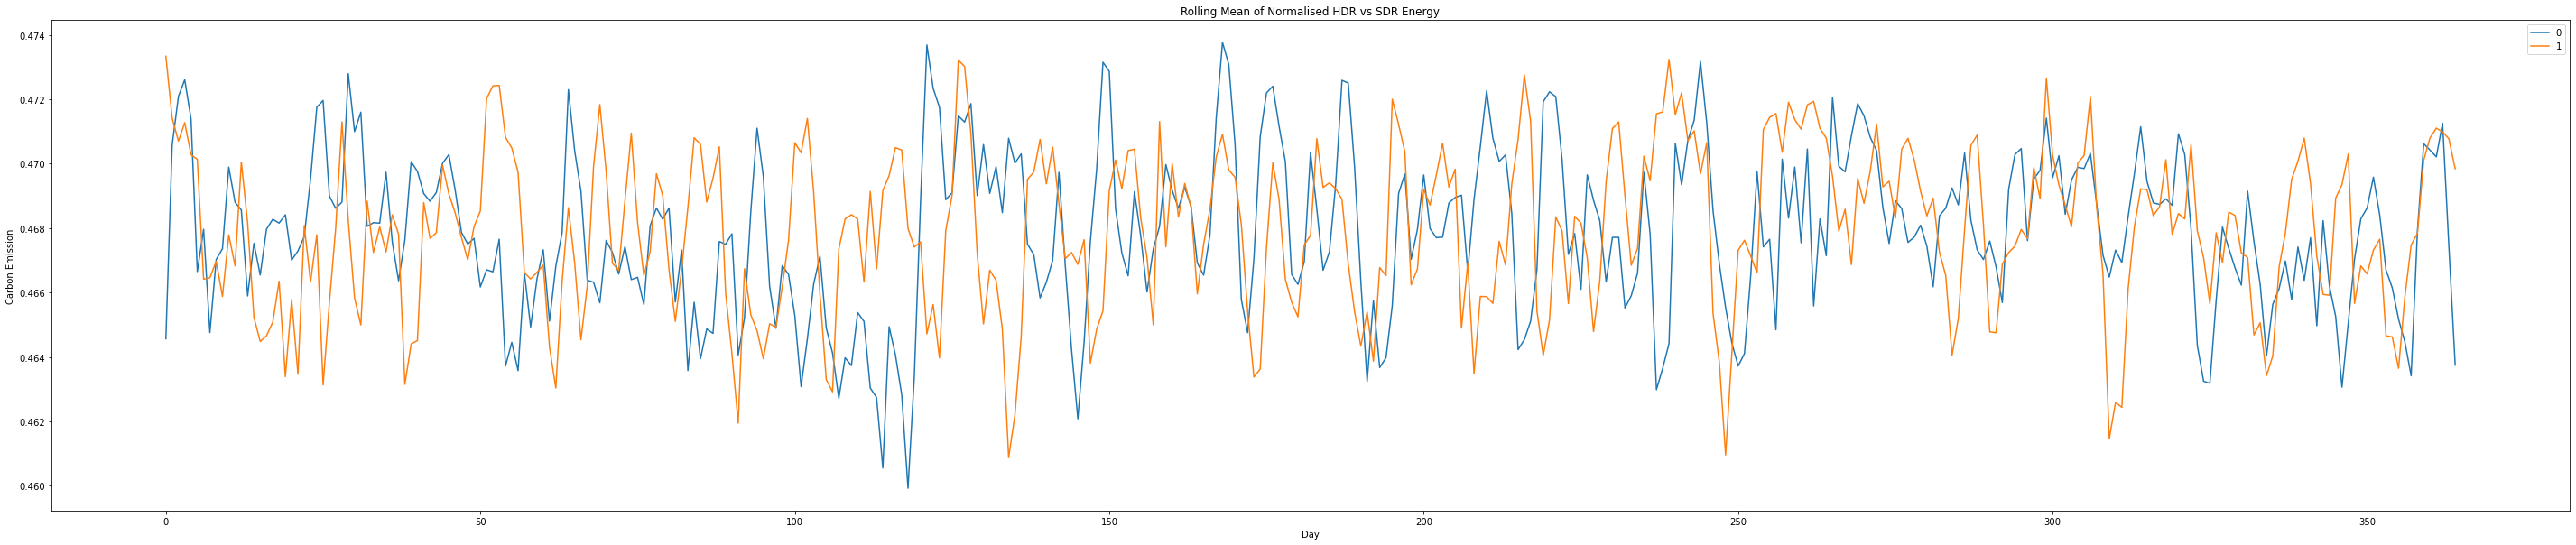

In [275]:
#Normalised

df_hdr_e_n = get_new_df(hdr_energy_df)
df_sdr_e_n = get_new_df(sdr_energy_df)

plot_daily(df_sdr_e_n.index,[df_sdr_e_n["total"], df_hdr_e_n["total"]], "Day", "Carbon Emission","Normalised HDR vs SDR Energy")

#Normailsed with rolling mean

df_sdr_e_n_rm = df_rolling_mean(df_sdr_e_n,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])
df_hdr_e_n_rm = df_rolling_mean(df_hdr_e_n,["Origin Datacentre", "Content Delivery Network","Core Network","Access Network","TV","total"])

plot_daily(df_sdr_e_n_rm.index,[df_sdr_e_n_rm["total"], df_hdr_e_n_rm["total"]], "Day", "Carbon Emission","Rolling Mean of Normalised HDR vs SDR Energy")